### Import modules and libraries

In [55]:
from pandas import read_csv, DatetimeIndex
from matplotlib.pyplot import subplots, xticks
from datetime import datetime
from seaborn import scatterplot

### Load and inspect data set

In [3]:
# Data set downloaded from: https://www.kaggle.com/datasets/farazrahman/earthquake/versions/262/data
# Explanation of features can be found: https://geographic.org/earthquakes/glossary.php & https://scedc.caltech.edu/recent/glossary.html

eq_df = read_csv('earthquake_data.csv')

print(eq_df.shape)
print(eq_df.head())
# print(eq_df.tail())
# print(eq_df['place'].sample(50))
eq_df.columns

(9322, 22)
                       time   latitude   longitude  depth   mag magType   nst  \
0  2025-05-17T02:07:34.810Z  38.810665 -122.822334   3.03  0.31      md   9.0   
1  2025-05-17T02:03:31.570Z  33.971333 -116.824000  16.24  0.78      ml  23.0   
2  2025-05-17T01:37:15.600Z  36.791832 -121.391335   5.27  1.22      md   8.0   
3  2025-05-17T01:31:48.466Z  60.774200 -150.996600  22.20  1.30      ml   NaN   
4  2025-05-17T01:11:24.500Z -57.115000  -67.591500  10.00  4.50      mb  25.0   

     gap     dmin   rms  ...                   updated  \
0   75.0  0.00564  0.02  ...  2025-05-17T02:09:12.695Z   
1   54.0  0.06507  0.18  ...  2025-05-17T02:07:02.926Z   
2  123.0  0.05276  0.04  ...  2025-05-17T01:52:15.949Z   
3    NaN      NaN  0.37  ...  2025-05-17T01:33:41.485Z   
4  146.0  3.19200  0.66  ...  2025-05-17T01:32:37.040Z   

                            place        type horizontalError depthError  \
0      7 km NW of The Geysers, CA  earthquake            0.50      1.730   
1

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [4]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9322 non-null   object 
 1   latitude         9322 non-null   float64
 2   longitude        9322 non-null   float64
 3   depth            9322 non-null   float64
 4   mag              9322 non-null   float64
 5   magType          9322 non-null   object 
 6   nst              7863 non-null   float64
 7   gap              7863 non-null   float64
 8   dmin             7842 non-null   float64
 9   rms              9321 non-null   float64
 10  net              9322 non-null   object 
 11  id               9322 non-null   object 
 12  updated          9322 non-null   object 
 13  place            9322 non-null   object 
 14  type             9322 non-null   object 
 15  horizontalError  7262 non-null   float64
 16  depthError       9321 non-null   float64
 17  magError      

In [5]:
# Check for Nan

eq_df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1459
gap                1459
dmin               1480
rms                   1
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2060
depthError            1
magError           1478
magNst             1459
status                0
locationSource        0
magSource             0
dtype: int64

In [6]:
eq_df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9322.000000,9322.000000,9322.000000,9322.000000,7863.000000,7863.000000,7842.000000,9321.000000,7262.000000,9321.000000,7844.000000,7863.000000
mean,38.776965,-111.465961,21.482881,1.533558,23.517868,110.773876,0.467401,0.255477,1.683026,2.377984,0.176219,18.810886
std,19.453289,64.626982,51.131155,1.294392,23.854369,64.156888,1.950282,0.264021,3.179959,5.648885,0.103498,31.888973
min,-60.624000,-179.967700,-3.470000,-1.650000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.893000,-149.462550,2.730000,0.730000,10.000000,65.000000,0.013400,0.070000,0.260000,0.430000,0.106000,7.000000
50%,38.817001,-122.103750,7.000000,1.300000,17.000000,92.000000,0.051850,0.160000,0.430000,0.710000,0.160000,12.000000
75%,51.637900,-114.424750,14.097500,2.000000,28.000000,145.000000,0.122300,0.360000,0.949168,1.700000,0.220000,21.000000
max,86.294500,179.889400,629.500000,7.400000,474.000000,358.180000,40.444000,1.610000,41.690000,135.200000,2.090000,825.000000


The earthquake data set consists of 9,322 rows and 22 features (catagorical and numerical).<br>
Interesting that 'depth' and 'mag' features can have negaitve values!<br>
Eight features (nst, gap, dmin, rms, horizontalError, depthErrr, magError and magNst) have missing values.<br>
Several of these are missing a significant proportion (15.7-22.1%) of data. I am hesistant to impute these without domain knowledge.<br>
However, 'rms' and 'depthError' (both floats) are missing only one data point each. Will impute these two using the mean. 

### Imputation of 'rms' & 'depthError' with mean

In [7]:
eq_df['rms'] = eq_df['rms'].fillna(eq_df['rms'].mean())
eq_df['depthError'] = eq_df['depthError'].fillna(eq_df['depthError'].mean())

# Check result of imputation
print(eq_df.isnull().sum())
eq_df.describe()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1459
gap                1459
dmin               1480
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2060
depthError            0
magError           1478
magNst             1459
status                0
locationSource        0
magSource             0
dtype: int64


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9322.000000,9322.000000,9322.000000,9322.000000,7863.000000,7863.000000,7842.000000,9322.000000,7262.000000,9322.000000,7844.000000,7863.000000
mean,38.776965,-111.465961,21.482881,1.533558,23.517868,110.773876,0.467401,0.255477,1.683026,2.377984,0.176219,18.810886
std,19.453289,64.626982,51.131155,1.294392,23.854369,64.156888,1.950282,0.264006,3.179959,5.648582,0.103498,31.888973
min,-60.624000,-179.967700,-3.470000,-1.650000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.893000,-149.462550,2.730000,0.730000,10.000000,65.000000,0.013400,0.070000,0.260000,0.430000,0.106000,7.000000
50%,38.817001,-122.103750,7.000000,1.300000,17.000000,92.000000,0.051850,0.160000,0.430000,0.710000,0.160000,12.000000
75%,51.637900,-114.424750,14.097500,2.000000,28.000000,145.000000,0.122300,0.360000,0.949168,1.700000,0.220000,21.000000
max,86.294500,179.889400,629.500000,7.400000,474.000000,358.180000,40.444000,1.610000,41.690000,135.200000,2.090000,825.000000


Imputation alters the standard deviations slightly (consequences for correlations?).

### Extract/parse date info
(to output to graph titles)

In [8]:
time_df = eq_df['time']

start_date = str(time_df[len(time_df)-1])  # Date of first recorded event. Returns a Pandas Series, so need to convert to str
# start_date = str(eq_df['time'][len(eq_df['time'])-1])

end_date = str(time_df[0])  # Date of last recorded event. Returns a Pandas Series, so need to convert to str
# end_date = str(eq_df['time'][0])

In [9]:
# Returned dates are strings in ISO 8601 format.
# Extract year, month, day by slicing
s_date = str(datetime.fromisoformat(start_date))  # Returns a datetime obj, so need to convert to str
s_date_y = s_date[:4]
s_date_m = s_date[5:7]
s_date_d = s_date[8:10]

e_date = str(datetime.fromisoformat(end_date))  # Returns a datetime obj, so need to convert to str
e_date_y = e_date[:4]
e_date_m = e_date[5:7]
e_date_d = e_date[8:10]


### Explore categorical data `.groupby()`: 'type' and 'magType'

In [10]:
print(eq_df['type'].nunique())
print(eq_df['type'].unique())
print(eq_df['type'].value_counts())

eq_df.groupby(['type']).count()

5
['earthquake' 'explosion' 'quarry blast' 'ice quake' 'other event']
type
earthquake      9091
quarry blast     119
explosion         92
ice quake         16
other event        4
Name: count, dtype: int64


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,id,updated,place,horizontalError,depthError,magError,magNst,status,locationSource,magSource
type,,,,,,,,,,,,,,,,,,,,,
earthquake,9091,9091,9091,9091,9091,9091,7653,7653,7634,9091,...,9091,9091,9091,7086,9091,7635,7653,9091,9091,9091
explosion,92,92,92,92,92,92,91,91,91,92,...,92,92,92,82,92,90,91,92,92,92
ice quake,16,16,16,16,16,16,0,0,0,16,...,16,16,16,0,16,0,0,16,16,16
other event,4,4,4,4,4,4,0,0,0,4,...,4,4,4,0,4,0,0,4,4,4
quarry blast,119,119,119,119,119,119,119,119,117,119,...,119,119,119,94,119,119,119,119,119,119


In [11]:
print(eq_df['magType'].nunique())
print(eq_df['magType'].unique())
print(eq_df['magType'].value_counts())

eq_df.groupby(['magType']).count()

10
['md' 'ml' 'mb' 'mww' 'mb_lg' 'mw' 'mwr' 'mh' 'mlv' 'mun']
magType
ml       5812
md       2634
mb        753
mww        80
mwr        18
mb_lg      11
mw          7
mh          5
mlv         1
mun         1
Name: count, dtype: int64


,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,net,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
magType,,,,,,,,,,,,,,,,,,,,,
mb,753,753,753,753,753,749,749,749,753,753,...,753,753,753,749,753,749,749,753,753,753
mb_lg,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
md,2634,2634,2634,2634,2634,2634,2634,2634,2634,2634,...,2634,2634,2634,2634,2634,2628,2634,2634,2634,2634
mh,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,0,5,5,5,5
ml,5812,5812,5812,5812,5812,4361,4361,4340,5812,5812,...,5812,5812,5812,3761,5812,4360,4361,5812,5812,5812
mlv,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mun,1,1,1,1,1,0,0,0,1,1,...,1,1,1,0,1,0,1,1,1,1
mw,7,7,7,7,7,7,7,7,7,7,...,7,7,7,6,7,0,6,7,7,7
mwr,18,18,18,18,18,16,16,16,18,18,...,18,18,18,16,18,16,16,18,18,18


### Bar & Pie charts of 'magType' & 'type'

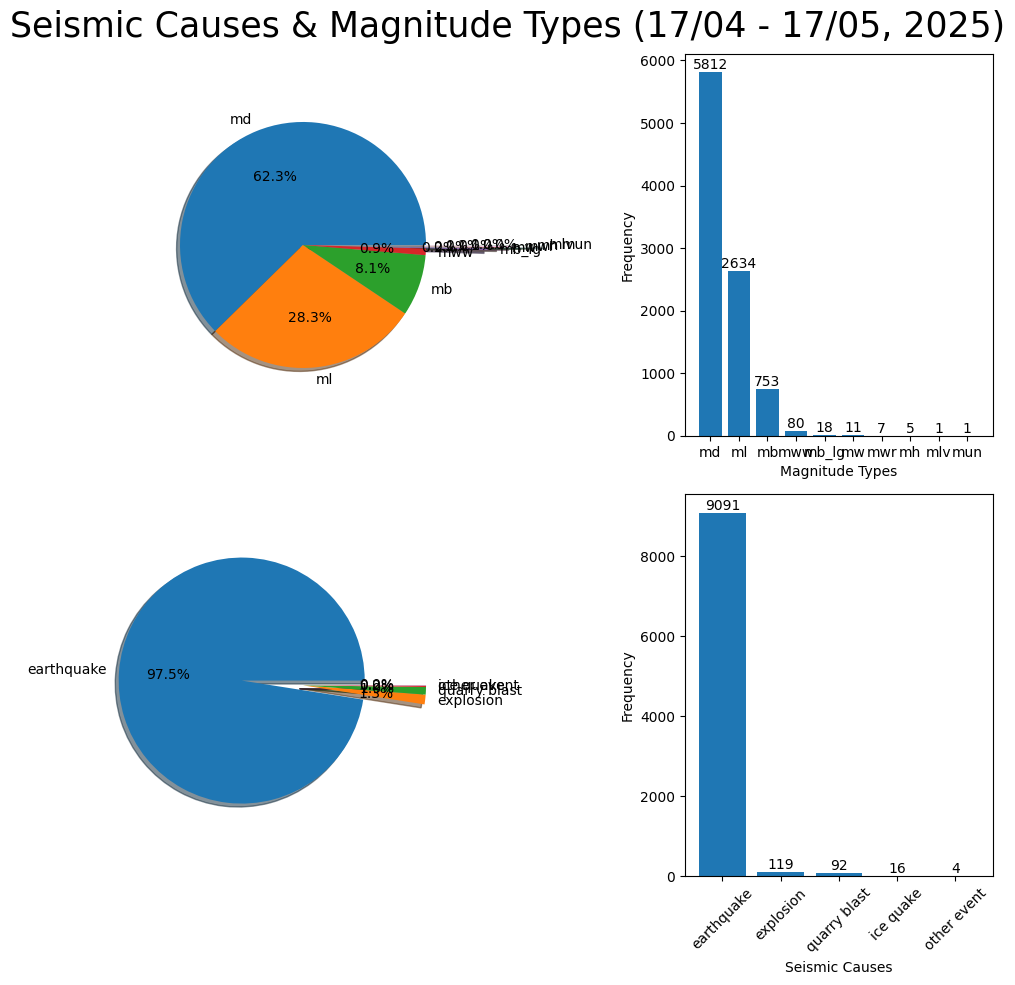

In [12]:
magType_df = eq_df['magType']
magType_labels = magType_df.unique().tolist()  # List of the 10 different (unique) magnitude types; `.tolist()` is for str, whereas `.to_list()` is for int
magType_freq = magType_df.value_counts().to_list()  # List of the frequency of occurrence (counts) of each of the 10 different magnitude types; `.to_list()` is for int, whereas `.tolist()` is for str
magType_exp = [0, 0, 0, 0, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # Specifies which pie segment to explode and how much

type_df = eq_df['type']
type_labels = type_df.unique().tolist()
type_freq = type_df.value_counts().to_list()
type_exp = [0.5, 0, 0, 0, 0]

nrows = 2
ncols = 2
fig, ax = subplots(nrows, ncols, figsize=(10,10))

ax[0,0].pie(magType_freq, labels=magType_labels, autopct='%1.1f%%', explode=magType_exp, shadow=True)

magType_bar_con = ax[0,1].bar(magType_labels, magType_freq)  # bar container
ax[0,1].bar_label(magType_bar_con)  # Add frequency counts to top (default) of each bar
ax[0,1].set_xlabel('Magnitude Types')
ax[0,1].set_ylabel('Frequency')

ax[1,0].pie(type_freq, labels=type_labels, autopct='%1.1f%%', explode=type_exp, shadow=True)

type_bar_con = ax[1,1].bar(type_labels, type_freq)
ax[1,1].bar_label(type_bar_con)
xticks(rotation=45)
ax[1,1].set_xlabel('Seismic Causes')
ax[1,1].set_ylabel('Frequency')

fig.suptitle(f'Seismic Causes & Magnitude Types ({s_date_d}/{s_date_m} - {e_date_d}/{e_date_m}, {e_date_y})', fontsize=25)
fig.tight_layout()

Pie charts are not effective when the feature distribution is unbalanced. A bar chart is better at conveying distribution.<br>
The most common magnitude types are 'md' and 'ml' by 1-3 orders of magnitude compared to other types.<br>
Similarly, the most common seismic cause is 'earthquake' by 1-3 orders of magnitude (no pun intended!) compared to other types.<br>
The above bar graph could have also been depicted using a histogram, however, a bar graph is visually more aesthetic.

### Histograms of select features: 'mag', 'depth', 'longitude', & 'latitude'

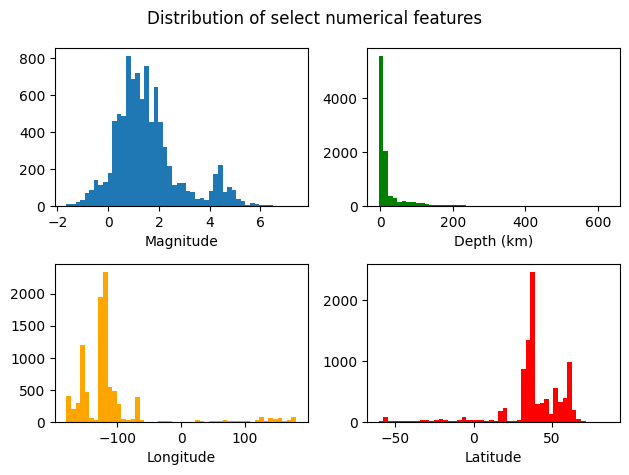

In [13]:
nrows = 2
ncols = 2
fig, ax = subplots(nrows, ncols)

bins = 50
ax[0,0].hist(eq_df['mag'], bins=bins, range=(eq_df['mag'].min(), eq_df['mag'].max()))
ax[0,0].set_xlabel('Magnitude')

ax[0,1].hist(eq_df['depth'], bins=bins, color='g',  range=(eq_df['depth'].min(), eq_df['depth'].max()))
ax[0,1].set_xlabel('Depth (km)')

ax[1,0].hist(eq_df['longitude'], bins=bins, color='orange', range=(eq_df['longitude'].min(), eq_df['longitude'].max()))
ax[1,0].set_xlabel('Longitude')

ax[1,1].hist(eq_df['latitude'], bins=bins, color='r', range=(eq_df['latitude'].min(), eq_df['latitude'].max()))
ax[1,1].set_xlabel('Latitude')

fig.suptitle('Distribution of select numerical features')
fig.tight_layout()


The magnitude distribution appears bimodal (warrants closer inspection).<br>
The majority of seismic activities are 'shallow' 10s of km.<br>
Seismic activities cluster around longtitude 100-130 and latitude ~50 - this translates to northwest USA, coinciding with the San Andreas fault (CA) and multiple fault lines in Alaska (see global scatter plot of seismic activity below).

### Box & Scatter plots of 'mag' & 'depth' 

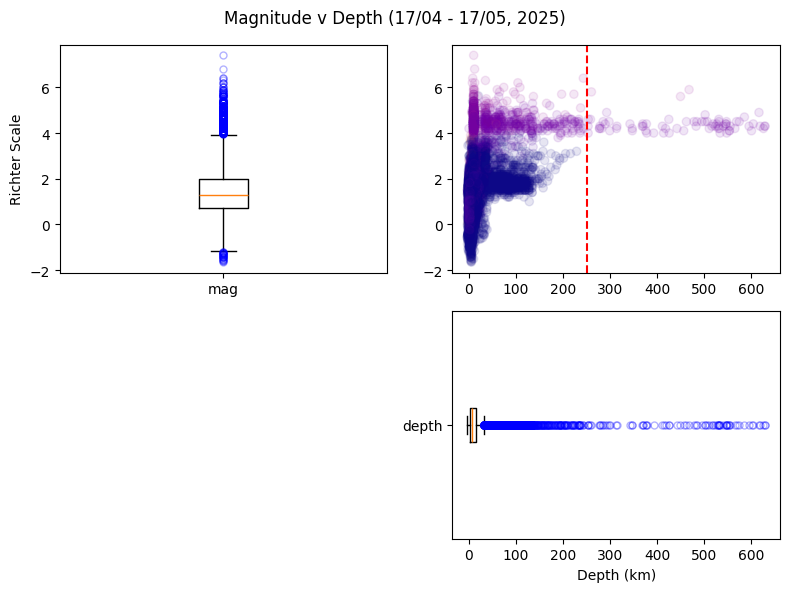

In [75]:
mag_df = eq_df['mag']
mag_label = [eq_df.columns[4]]  # Get feature name, 'mag', and store in a list

depth_df = eq_df['depth']
depth_label = [eq_df.columns[3]]

# Convert 'magType' categories to integers, to use to colour scatter plot
replace_dict = {'ml' : 1,
                'md' : 2,
                'mb' : 3,
                'mww' : 4,
                'mwr' : 5,
                'mb_lg' : 6,
                'mw' : 7,
                'mh' : 8,
                'mlv' : 9,
                'mun' : 10
                         }

eq_df['magTypeCol'] = [replace_dict[item] for item in eq_df['magType']]

# print(eq_df.columns)

nrows = 2
ncols = 2
fig, ax = subplots(nrows, ncols, figsize=(8,6))

ax[0,0].boxplot(mag_df, tick_labels=mag_label, flierprops=dict(markersize=5, markeredgecolor='b', alpha=0.3))
ax[0,0].set_ylabel('Richter Scale')

# ax[0,1].scatter(depth_df, mag_df, alpha=0.1)
im = ax[0,1].scatter(eq_df['depth'], eq_df['mag'], c=eq_df['magTypeCol'], cmap='plasma', alpha=0.1)
# ax[0,1].legend(handles=im.legend_elements()[0])
ax[0,1].axvline(250, linestyle='--', c='r')


ax[1,0].axis('off')  # Hide unused axis

ax[1,1].boxplot(depth_df, tick_labels=depth_label, flierprops=dict(markersize=5, markeredgecolor='b', alpha=0.3), vert=False)
ax[1,1].set_xlabel('Depth (km)')

fig.suptitle(f'Magnitude v Depth ({s_date_d}/{s_date_m} - {e_date_d}/{e_date_m}, {e_date_y})')
fig.tight_layout()

Outliers are good (in this case)! Intriguing increase in depth for magnitudes 4-5!<br>
Investigate longitude and latitude for depths > 250 km<br>
Don't have data for higher magnitudes to infer correlation.

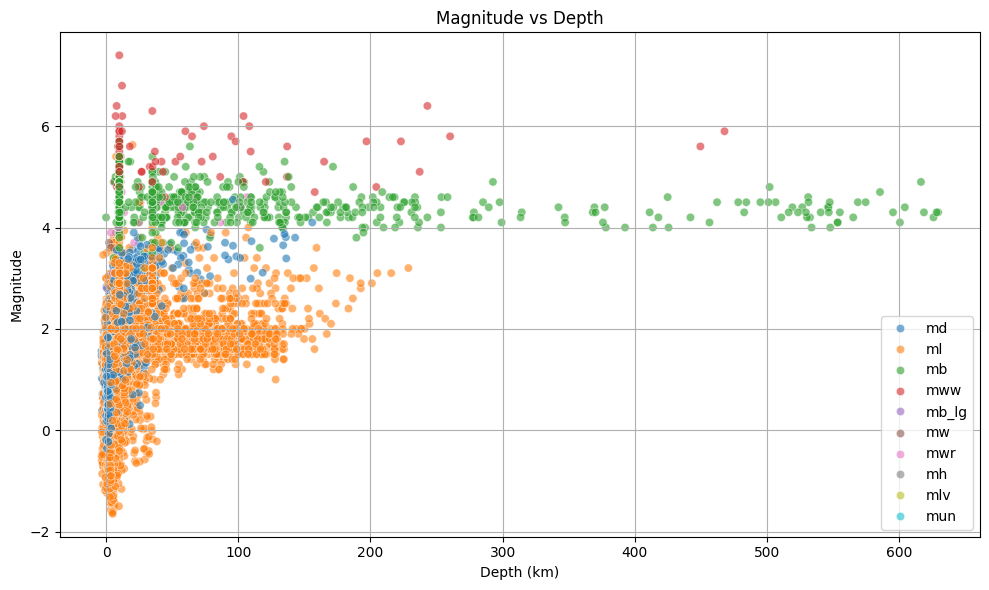

In [ ]:
# Try scatter plot using Seaborn
fig, ax = subplots(figsize=(10,6))

scatterplot(data=eq_df, x='depth', y='mag', hue='magType', alpha=0.6)
ax.set_title('Magnitude vs Depth')
ax.set_xlabel('Depth (km)')
ax.set_ylabel('Magnitude')
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(loc='lower right')
ax.grid(True)
fig.tight_layout()


Colouring according to 'magType', looks like the deep, mag 4-5 seismic activities are of magType mb.

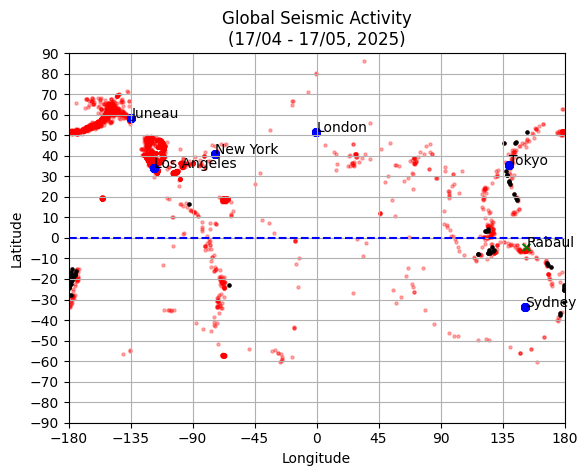

In [ ]:
# All longitude and latitude
lat = eq_df['latitude']
long = eq_df['longitude']

# Longitude and latitude for depths > 250 km
depth250_df = eq_df[eq_df['depth'] > 250]  # Filter for depth > 250
# print(depth250_df[['latitude', 'longitude', 'depth']].sample(50))  # Check that samples are all of depth > 250
lat250 = depth250_df['latitude']
long250 = depth250_df['longitude']

fig, ax = subplots()

ax.scatter(long, lat, s=5, c='r', alpha=0.3)  # All longitude and latitude
ax.scatter(long250, lat250, s=5, c='k')  # Longitude and latitude for depths > 250 km
ax.axhline(0, linestyle='--', c='b')
ax.set_xlabel('Longitude')
ax.set_xlim(-180, 180)
ax.set_xticks(range(-180, 181, 45))
ax.set_ylabel('Latitude')
ax.set_ylim(-90, 90)
ax.set_yticks(range(-90, 91, 10))
ax.grid(which='both')
ax.set_title(f'Global Seismic Activity\n({s_date_d}/{s_date_m} - {e_date_d}/{e_date_m}, {e_date_y})')

cities = ['Juneau', 'Los Angeles', 'London', 'New York', 'Sydney', 'Tokyo']
cities_lat = [58.30, 34.05, 51.51, 40.71, -33.77, 35.68]
cities_long = [-134.42, -118.24, -0.13, -74.01, 151.21, 139.76]

for i in range(len(cities)):
    ax.text(cities_long[i], cities_lat[i], cities[i])  # Write city names to the longitude and latitude
    ax.scatter(cities_long, cities_lat, s=30, c='b')  # Mark cities with blue 'o'

rabaul_lat = -4.21
rabaul_long = 152.18
ax.scatter(rabaul_long, rabaul_lat, marker='x', s=30, c='g')
ax.text(rabaul_long, rabaul_lat, "Rabaul");

Earthquakes at greater than 250 km are mostly in the Asian side of the Pacific Rim of Fire.

In [ ]:
# Getting a glimpse of the earthquake locations
eq_df['place'].value_counts().sample(50)

place
9 km WNW of Cobb, CA                                33
30 km NNE of Finschhafen, Papua New Guinea           1
14 km SSE of Volcano, Hawaii                         1
31 km W of Hakui, Japan                              1
3 km WSW of Point MacKenzie, Alaska                  1
32 km W of Susitna, Alaska                           1
76 km S of Nikolai, Alaska                           1
86 km NNW of Karluk, Alaska                         17
9 km W of Moose Pass, Alaska                         1
9 km ESE of Loomis, Washington                       1
5 km NNW of Beaumont, CA                             1
9 km SE of Redwood Valley, CA                        1
19 km S of Funny River, Alaska                       1
25 km WNW of Susitna, Alaska                         1
13 km NNE of Gura Teghii, Romania                    1
13 km SSW of False Pass, Alaska                      1
16 km N of Mojave, CA                                1
61 km SE of Adak, Alaska                             1
18 k

Locations of seismic activities are west coast USA-centric.

### Line graph of seismic events/day

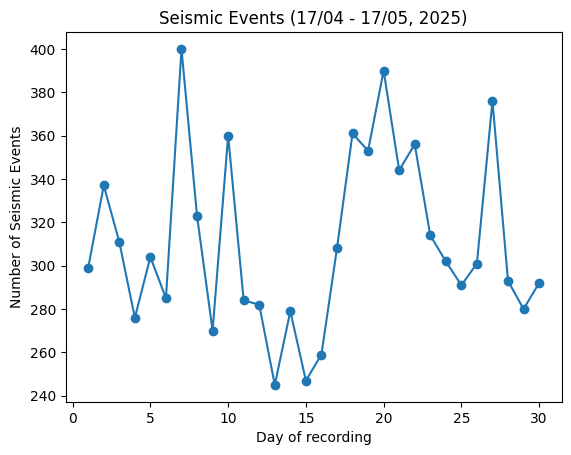

In [ ]:
eq_df['day'] = DatetimeIndex(eq_df['time']).day  # Extract day from 'time' feature and add 'day' feature to eq_df

# print(eq_df['day'].nunique())
# print(eq_df.columns)
# print(eq_df.groupby('day').value_counts())
# eq_df.groupby('day').count()
# eq_df.groupby('day')
# print(eq_df.groupby('day')['mag'].count())  # Count the number of seismic events ('mag') when grouped by day

fig, ax = subplots()

ax.plot(eq_df.groupby('day')['mag'].count().index, eq_df.groupby('day')['mag'].count(), marker='o')
ax.set_xlabel('Day of recording')
ax.set_ylabel('Number of Seismic Events')
ax.set_title(f'Seismic Events ({s_date_d}/{s_date_m} - {e_date_d}/{e_date_m}, {e_date_y})');


Hundreds of seismic events are detected per day, apparently occuring stochastically.